# Trump Tweet Analysis

In [8]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("trump_insult_tweets_2014_to_2021.csv").iloc[:,1:]

### Explore

In [10]:
#add year
df['year'] = [int(df['date'].values[i].split('-')[0]) for i in range(df.shape[0])]

In [11]:
df.head()

,date,target,insult,tweet,year
0,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",2014
1,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",2014
2,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...,2015
3,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...,2015
4,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily...",2015


In [12]:
df['year'].value_counts()

2020    2712
2019    2426
2018    1777
2016    1539
2017    1120
2015     757
2021      27
2014       2
Name: year, dtype: int64

In [13]:
#size of the plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

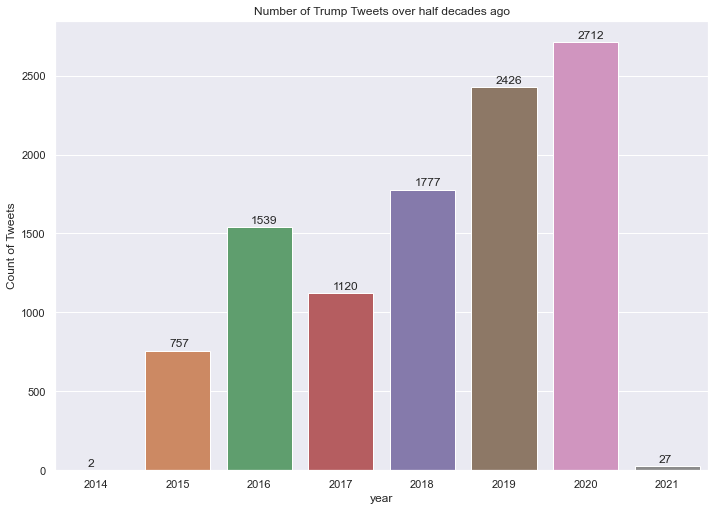

In [14]:
ax = sns.countplot(df['year'])
ax.set_title("Number of Trump Tweets over half decades ago")
ax.set(ylabel= "Count of Tweets")

#add exact number
n = 25
x = 1
count = [2,757,1539,1120,1777,2426,2712,27]

for i in range(len(count)):
    ax.text(-0.1 + i*x, count[i]+n, s=str(count[i]))

In [15]:
df['target'].value_counts()[df['target'].value_counts() > 100]

the-media              1287
democrats               647
hillary-clinton         625
trump-russia            441
joe-biden               402
the-new-york-times      392
cnn                     295
impeachment-inquiry     247
2020-election           143
adam-schiff             143
nancy-pelosi            129
james-comey             122
michael-bloomberg       116
washington-post         115
mueller-team            110
ted-cruz                110
Name: target, dtype: int64

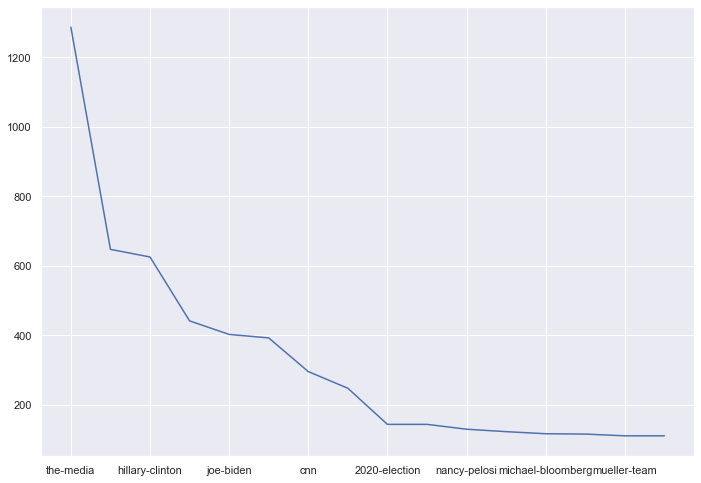

In [16]:
df['target'].value_counts()[df['target'].value_counts() > 100].plot()

### Text Preprocessing for tweets

Tasks:
1. Make all tweets into lowercase letter
2. Remove numbers
3. Remove punctuations
4. Tokenize the words
5. Remove stop words ("the", "is", "a", "on")
6. Stemming (i.e. books -> book)

In [26]:
import re
import nltk
import string

from nltk.tokenize import word_tokenize #tokenize method
from nltk.stem import PorterStemmer #stemming method

In [18]:
tweets = df['tweet'].values

#combine all tweets into one
all_tweets = " ".join(tweets)

In [44]:
def process_strings(tweets):
    tweets = tweets.lower() #1 make tweets lowercase
    tweets = re.sub(r'\d+', '', tweets) #2 remove digit/number
    tweets = tweets.translate(str.maketrans('', '', string.punctuation)) #3 remove punctuation
    tweets = word_tokenize(tweets) #4 tokenize
    
    nltk_stop_words = nltk.corpus.stopwords.words('english') #list of stop words
    tweets = [tweet for tweet in tweets if tweet not in nltk_stop_words] #5 remove stop words
    
    stemmer = PorterStemmer() #stemming instance
    tweets = [stemmer.stem(tweet) for tweet in tweets] #6 stemming
    
    return tweets

In [45]:
clean_tweets = process_strings(all_tweets)

In [67]:
tweets_count = pd.DataFrame(np.unique(np.array(clean_tweets), return_counts = True)).T
tweets_count.columns = ['word', "count"]

In [72]:
tweets_count

,word,count
0,aap,3
1,aaron,1
2,ab,1
3,abandon,8
4,abbott,3
...,...,...
7715,‚äúcollud,1
7716,‚äúno,1
7717,“,1226
7718,”,1255


In [73]:
tweets_count.sort_values(by="count", axis=0)

,word,count
1775,doneand,1
5642,quitter,1
1435,danhenning,1
5646,rabid,1
1432,danaperino,1
...,...,...
5267,peopl,1522
1554,democrat,1704
4890,news,2212
2145,fake,2368
